## Titanic Survival Prediction (Ensemble)

## Introduction
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

The goal of the project is to build a model that predicts what kind of people were more likely to survive.

## Import Libraries

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Import Datasets

In [61]:
df = pd.read_csv('../input/titanic/train.csv')

## Data Cleaning

In [62]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
df.shape

(891, 12)

In [64]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [65]:
mean_age = df['Age'].mean(axis=0)
df['Age'].replace(np.nan, mean_age, inplace=True)

In [66]:
mean_fare = df['Fare'].mean(axis=0)
df['Fare'].replace('np.nan', mean_fare, inplace=True)

In [67]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [68]:
df['Embarked'].replace(np.nan, 'S',inplace=True)

In [69]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [70]:
df.drop('Cabin',axis=1, inplace=True)

In [71]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Exploratory Data Analysis

In [72]:
def plots(data, fig):
  plt.subplot(3,3,fig)
  sns.countplot(x = data, data = df)
  plt.title(data+ ' Count')

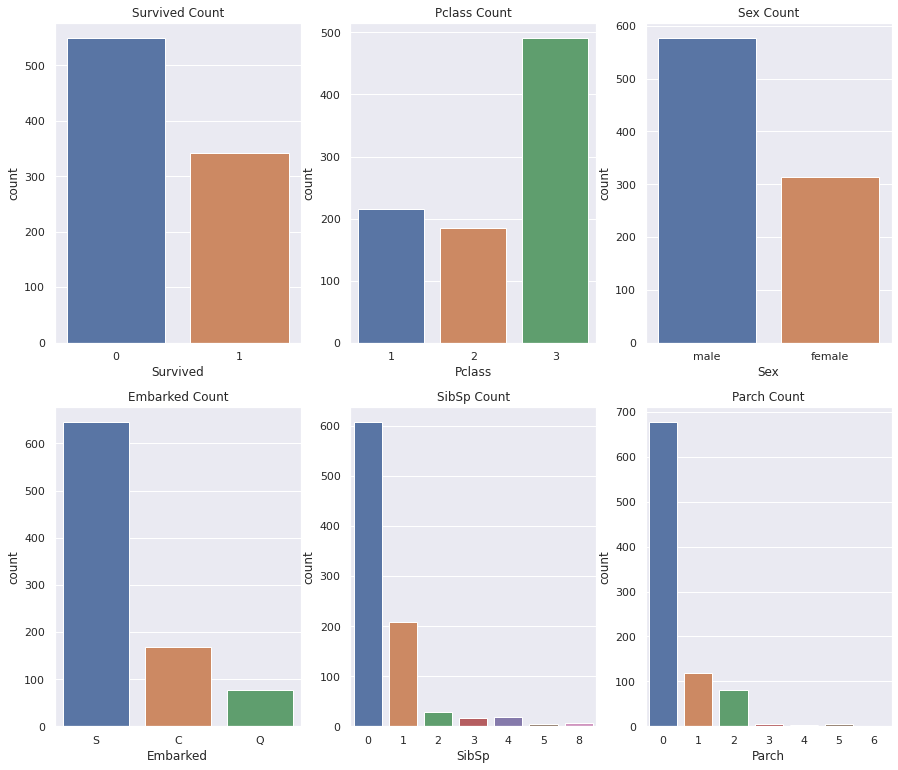

In [73]:
plt.figure(figsize=(15,20))
plots('Survived', 1)
plots('Pclass', 2)
plots('Sex', 3)
plots('Embarked', 4)
plots('SibSp', 5)
plots('Parch', 6)

## Model Building

In [74]:
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

In [75]:
X[:5]

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


### Label Encoding of Categorical Variables

In [76]:
from sklearn import preprocessing
model_sex = preprocessing.LabelEncoder()
model_sex.fit(['male', 'female'])
X['Sex'] = model_sex.transform(X['Sex'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [77]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


In [78]:
y = df['Survived']

### Train Test Split

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Decision Tree

In [80]:
from sklearn.tree import DecisionTreeClassifier
survival_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
survival_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [81]:
survived_predict = survival_tree.predict(X_test)

### Decision Tree Model Evaluation

In [82]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, survived_predict))

0.8246268656716418


In [83]:
from sklearn.metrics import f1_score
print(metrics.f1_score(y_test, survived_predict, average='weighted'))

0.8232360456362579


In [84]:
from sklearn.metrics import jaccard_score
print(metrics.jaccard_score(y_test, survived_predict, average='weighted'))

0.7027650210486031


In [85]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.


              precision    recall  f1-score   support

           0       0.85      0.88      0.86       168
           1       0.78      0.73      0.76       100

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268

Confusion matrix, without normalization
[[ 73  27]
 [ 20 148]]


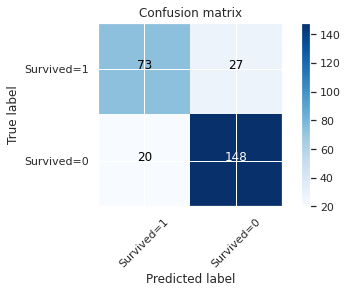

In [86]:
cnf_matrix = confusion_matrix(y_test, survived_predict, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test, survived_predict))

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Survived=1','Survived=0'],normalize= False,  title='Confusion matrix')

### K Nearest Neighbors

In [87]:
X_k = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [88]:
X_k[:5]

array([[ 0.83,  0.74, -0.59,  0.43, -0.47, -0.5 ],
       [-1.57, -1.36,  0.64,  0.43, -0.47,  0.79],
       [ 0.83, -1.36, -0.28, -0.47, -0.47, -0.49],
       [-1.57, -1.36,  0.41,  0.43, -0.47,  0.42],
       [ 0.83,  0.74,  0.41, -0.47, -0.47, -0.49]])

In [89]:
X_train_k, X_test_k, y_train, y_test = train_test_split(X_k, y, test_size=0.3, random_state=0)

In [90]:
from sklearn.neighbors import KNeighborsClassifier
K = 10
neigh = KNeighborsClassifier(n_neighbors=K).fit(X_train_k, y_train)
neigh

KNeighborsClassifier(n_neighbors=10)

In [91]:
yhat = neigh.predict(X_test_k)

### K Nearest Neighbors Model Evaluation

In [92]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, yhat))

0.8022388059701493


              precision    recall  f1-score   support

           0       0.82      0.87      0.85       168
           1       0.76      0.69      0.72       100

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268

Confusion matrix, without normalization
[[ 69  31]
 [ 22 146]]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.


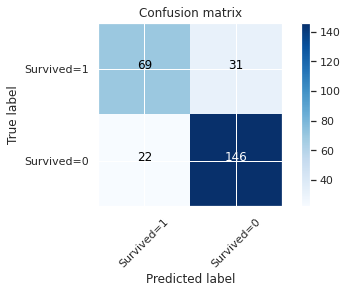

In [93]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Survived=1','Survived=0'],normalize= False,  title='Confusion matrix')

### Logistic Regression

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
LR

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(C=0.01, solver='sag')

In [95]:
yhat_L = LR.predict(X_test)
yhat_L[:5]

array([0, 0, 0, 1, 0])

In [96]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[:5]

array([[0.68, 0.32],
       [0.7 , 0.3 ],
       [0.59, 0.41],
       [0.24, 0.76],
       [0.65, 0.35]])

### Logistic Regression Model Evaluation

In [97]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat_L,pos_label=0)

0.6820083682008368

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.


              precision    recall  f1-score   support

           0       0.70      0.97      0.81       168
           1       0.85      0.29      0.43       100

    accuracy                           0.72       268
   macro avg       0.77      0.63      0.62       268
weighted avg       0.75      0.72      0.67       268

Confusion matrix, without normalization
[[ 29  71]
 [  5 163]]


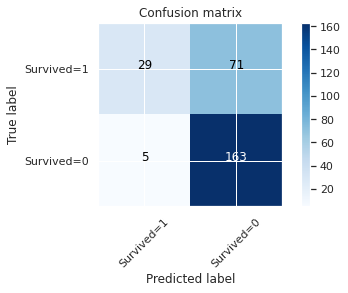

In [98]:
cnf_matrix = confusion_matrix(y_test, yhat_L, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_L))

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Survived=1','Survived=0'],normalize= False,  title='Confusion matrix')

In [99]:
df_test = pd.read_csv('../input/titanic/test.csv')

### Model Deployment

In [100]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [101]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [102]:
mean_ages = df_test['Age'].mean(axis=0)
df_test['Age'].replace(np.nan, mean_age, inplace=True)

In [103]:
mean_fares = df_test['Fare'].mean(axis=0)
df_test['Fare'].replace(np.nan, mean_fares, inplace=True)

In [104]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [105]:
X_test_f = df_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

In [106]:
X_test_f.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,34.5,0,0,7.8292
1,3,female,47.0,1,0,7.0000
2,2,male,62.0,0,0,9.6875
3,3,male,27.0,0,0,8.6625
4,3,female,22.0,1,1,12.2875


In [107]:
from sklearn import preprocessing
model_sex = preprocessing.LabelEncoder()
model_sex.fit(['male', 'female'])
X_test_f['Sex'] = model_sex.transform(X_test_f['Sex'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [108]:
predicted = survival_tree.predict(X_test_f)

In [109]:
predicted

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [110]:
final_submission = pd.DataFrame()
final_submission['PassengerId'] = df_test['PassengerId']
final_submission['Survived'] = predicted
final_submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


## Conclusion
I have determined the best model to use to predict which persons survived the titanic is Decision Tree.